## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Read Datasets

In [2]:
Hack_train = pd.read_csv(r"C:\Users\Dell\Desktop\AI Wed\Hackathon\train1.csv")
Hack_test = pd.read_csv(r"C:\Users\Dell\Desktop\AI Wed\Hackathon\test1.csv")
sample_submission = pd.read_csv(r"Desktop/AI Wed/Hackathon/sample_submission.csv")

In [3]:
Hack_train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [4]:
Hack_test.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN


In [5]:
sample_submission.head()

,Customer_ID,total_claim_amount
0,Customer_521,143059
1,Customer_737,42418
2,Customer_740,84649
3,Customer_660,150389
4,Customer_411,11139


## Data Preprocessing of the Train and Test Dataset

### Replacing ? with NaN

In [6]:
Hack_train.replace("?", np.NaN, inplace = True)
Hack_train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,NaN,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,NaN,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [7]:
Hack_test.replace("?", np.NaN, inplace = True)

### Back filling NaN values

In [8]:
Hack_train= Hack_train.fillna(method='bfill')

In [9]:
Hack_train.head(2)

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00


In [10]:
Hack_test = Hack_test.fillna(method='bfill')

In [11]:
Hack_train['property_damage'].value_counts()

NO     366
YES    333
Name: property_damage, dtype: int64

In [12]:
Hack_train['collision_type'].value_counts()

Rear Collision     250
Side Collision     233
Front Collision    217
Name: collision_type, dtype: int64

In [13]:
Hack_train['police_report_available'].value_counts()

NO     368
YES    332
Name: police_report_available, dtype: int64

### Exploratory Data Analysis of the Train Dataset

<AxesSubplot:>

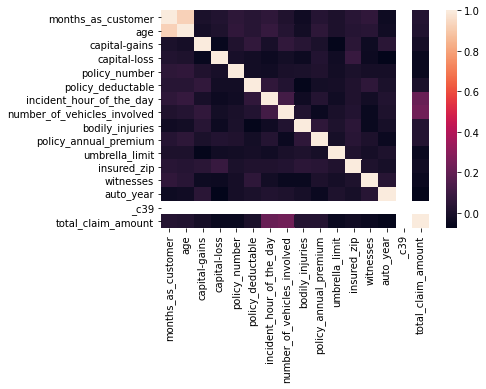

In [14]:
sns.heatmap(Hack_train.corr())

### Feature Selection

In [15]:
Hack_train.drop(['_c39', 'months_as_customer', 'Customer_ID', 'capital-gains', 'insured_occupation', 'bodily_injuries', 'umbrella_limit', 'insured_education_level', 'insured_hobbies', 'insured_zip'], axis = 1, inplace = True)
Hack_train.head(2)

,age,insured_sex,insured_relationship,capital-loss,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,incident_location,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,total_claim_amount
0,41,FEMALE,other-relative,-6300,743092,11/11/2013,OH,250/500,1000,6303 1st Drive,...,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,14386.67
1,31,MALE,not-in-family,0,492224,09/12/2005,IN,500/1000,2000,5585 Washington Drive,...,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,76440.00


In [16]:
Hack_test.drop(['_c39', 'months_as_customer', 'insured_occupation', 'capital-gains', 'bodily_injuries', 'umbrella_limit', 'insured_education_level', 'insured_hobbies', 'insured_zip'], axis = 1, inplace = True)
Hack_test.head(2)

,Customer_ID,age,insured_sex,insured_relationship,capital-loss,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year
0,Customer_521,26,FEMALE,not-in-family,0,924318,27/07/2014,IL,250/500,2000,...,Rear Collision,Total Loss,Ambulance,WV,Springfield,3,YES,Audi,A5,2003
1,Customer_737,33,FEMALE,husband,0,180286,08/02/2009,IL,500/1000,1000,...,Front Collision,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006


## Splitting Data into features and label

In [17]:
X = Hack_train.drop(['total_claim_amount'], axis = 1)

In [18]:
y = Hack_train['total_claim_amount']

In [19]:
X.shape

(700, 26)

In [20]:
Hack_test.shape

(300, 27)

In [21]:
train = pd.get_dummies(X)
test = pd.get_dummies(Hack_test)

### Aligning Train and Test Data for equality of columns

In [22]:
final_train, final_test = train.align(test, join='inner', axis=1)

In [23]:
final_train.shape

(700, 187)

In [24]:
final_test.shape

(300, 187)

### Scaling train and test data

## Model Building

In [25]:
X_train, X_test, y_train, y_test = train_test_split (final_train, y, test_size = 0.25, random_state = 12345)

### Training Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)

LinearRegression()

In [28]:
linearmodel_prediction = linearmodel.predict(X_test)

In [29]:
MSE = metrics.mean_squared_error(y_test, linearmodel_prediction)
MSE

511716542.2515128

In [30]:
np.sqrt(MSE)

22621.152540299816

In [31]:
rsqd3 = r2_score(y_test.tolist(), linearmodel_prediction.tolist())
rsqd3

0.6449176013463556

### Training Xtreme Gradient Boost Model

In [32]:
from xgboost import XGBRegressor
xgboostmodel = XGBRegressor()
xgboostmodel = xgboostmodel.fit(X_train, y_train)

[23:38:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
xgboostmodel_prediction = xgboostmodel.predict(X_test)

In [34]:
MSE2 = metrics.mean_squared_error(y_test, xgboostmodel_prediction)
MSE2

425022492.40754586

In [35]:
np.sqrt(MSE2)

20616.07364188307

In [36]:
rsqd2 = r2_score(y_test.tolist(), xgboostmodel_prediction.tolist())
rsqd2

0.7050749904980708

### Training Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestRegressor

randomforestmodel = RandomForestRegressor()

In [38]:
randomforestmodel.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

In [40]:
MSE4 = metrics.mean_squared_error(y_test,randomforestmodel_prediction)
MSE4

382790219.4791554

In [41]:
np.sqrt(MSE4)

19565.025414733183

In [42]:
rsqd = r2_score(y_test.tolist(), randomforestmodel_prediction.tolist())
rsqd

0.7343801536769419

Random Forest Model performs better than other models in RMSE and R^2 values

### Getting result for Random Forest Model

In [43]:
submission_file4 = randomforestmodel.predict(final_test)

In [44]:
results3 = pd.Series(submission_file4, name = 'total_claim_amount')
submission6 = pd.concat([Hack_test['Customer_ID'], results3], axis = 1)

In [45]:
submission6.head()

,Customer_ID,total_claim_amount
0,Customer_521,79108.3998
1,Customer_737,71218.3996
2,Customer_740,90289.2005
3,Customer_660,90516.1338
4,Customer_411,6289.2003


<AxesSubplot:xlabel='total_claim_amount'>

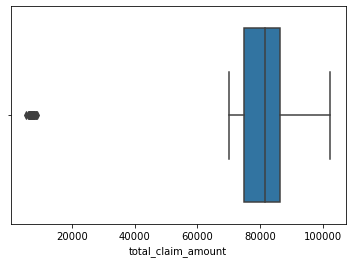

In [46]:
sns.boxplot(x ='total_claim_amount', data= submission6)

In [47]:
submission6.to_csv('final_Submission.csv', index = False )